In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat.processRoc(df=pd.read_csv('/home/ishanu/ZED/Research/publications/pub_pf_/data_broad/ROC/M.csv'),
           order=3, 
           total_samples=1000,
           positive_samples=470,
           alpha=0.01,
           prevalence=.5)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=False)
zt.usample(precision=3)
zt.getBounds()

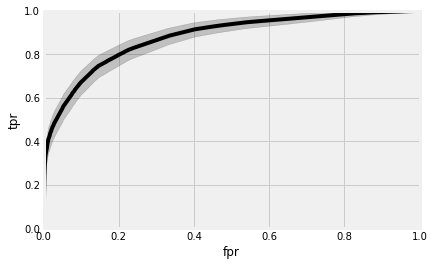

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [5]:
zt.auc()

(0.8808503350707372, 0.9111675865365443, 0.8505330836049301)

In [6]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,NaN,0.500000,0.500000,NaN,1.000000,1.470513
0.001,0.158600,0.990710,0.578553,0.543118,106.661105,0.842633,0.300871
0.002,0.240879,0.989851,0.619193,0.568030,98.044597,0.761003,0.231661
0.003,0.291884,0.988242,0.644196,0.584673,84.529269,0.710587,0.165166
0.004,0.319806,0.986215,0.657663,0.594100,72.044354,0.683251,0.112554
...,...,...,...,...,...,...,...
0.996,0.999876,0.500945,0.501867,0.968835,1.003822,0.032167,0.001352
0.997,0.999907,0.500709,0.501400,0.968835,1.002867,0.032167,0.001352
0.998,0.999938,0.500472,0.500933,0.968835,1.001911,0.032167,0.001352


In [7]:
zt.operating_zone(LRminus=.95,LRplus=4)
display(zt._operating_zone)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.001,0.158600,0.990710,0.578553,0.543118,106.661105,0.842633,0.300871
high sensitivity,0.198,0.796314,0.800254,0.798743,0.797345,4.008419,0.254188,0.005731


            tpr       ppv       acc       npv         LR+       LR-  threshold
fpr                                                                           
0.000  0.000000       NaN  0.500000  0.500000         NaN  1.000000   1.470513
0.001  0.158600  0.990710  0.578553  0.543118  106.661105  0.842633   0.300871
0.002  0.240879  0.989851  0.619193  0.568030   98.044597  0.761003   0.231661
0.003  0.291884  0.988242  0.644196  0.584673   84.529269  0.710587   0.165166
0.004  0.319806  0.986215  0.657663  0.594100   72.044354  0.683251   0.112554
...         ...       ...       ...       ...         ...       ...        ...
0.996  0.999876  0.500945  0.501867  0.968835    1.003822  0.032167   0.001352
0.997  0.999907  0.500709  0.501400  0.968835    1.002867  0.032167   0.001352
0.998  0.999938  0.500472  0.500933  0.968835    1.001911  0.032167   0.001352
0.999  0.999969  0.500236  0.500467  0.968835    1.000956  0.032167   0.001352
1.000  1.000000  0.500000  0.500000  0.968835    1.0

ValueError: cannot convert float NaN to integer

## writing tables to latex

In [ ]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [ ]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

In [ ]:
from zedstat.textable import textable
#textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     